In [2]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectKBest, f_regression
data = pd.read_csv('/content/drive/MyDrive/work/train_commerce.csv', index_col=0)
df = data.dropna()
print(df.dtypes)
df['Warehouse_block'] = df['Warehouse_block'].map({'A':0, 'B':1, 'C':2, 'D':3, 'F':4})
df['Mode_of_Shipment'] = df['Mode_of_Shipment'].map({'Flight':0, 'Road':1, 'Ship':2})
df['Product_importance'] = df['Product_importance'].map({'low':0, 'medium':1, 'high':2})
df['Gender'] = df['Gender'].map({'F':0, 'M':1})
df['Reached.on.Time_Y.N'] = df['Reached.on.Time_Y.N'].astype('category')
x = df.drop(['Reached.on.Time_Y.N'], axis='columns').to_numpy()
y = df['Reached.on.Time_Y.N'].to_numpy()
model = LinearRegression()
model.fit(x,y)
coefimportance = np.abs(model.coef_)
sortedFeature = np.argsort(coefimportance)[::-1]
print(sortedFeature)

Mounted at /content/drive
Warehouse_block        object
Mode_of_Shipment       object
Customer_care_calls     int64
Customer_rating         int64
Cost_of_the_Product     int64
Prior_purchases         int64
Product_importance     object
Gender                 object
Discount_offered        int64
Weight_in_gms           int64
Reached.on.Time_Y.N     int64
dtype: object
[2 6 5 8 7 3 1 0 4 9]


In [3]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
data = pd.read_csv('/content/drive/MyDrive/work/train_commerce.csv', index_col=0)
df = data.dropna()
print(df.dtypes)
df['Product_importance'] = df['Product_importance'].map({'low':0, 'medium':1, 'high':2})
df['Reached.on.Time_Y.N'] = df['Reached.on.Time_Y.N'].astype('category')
x = df[['Customer_care_calls', 'Product_importance', 'Prior_purchases']].to_numpy()
y = df['Reached.on.Time_Y.N'].to_numpy()
trainx, testx, trainy, testy = train_test_split(x, y, test_size=0.3, random_state=55)
scaler = StandardScaler()
scaler.fit(trainx)
trainx_scale = scaler.transform(trainx)
testx_scale = scaler.transform(testx)
model = LogisticRegression(C=20, max_iter=1000)
model.fit(trainx_scale, trainy)
predictions = model.predict(testx_scale)
print('*** 검증집합 예측 결과(첫 10행:(실제값, 예측값)) ***')
result = pd.DataFrame(np.array([testy, predictions]).transpose(), columns=['Actual', 'Predict'])
print(result.head(10))
print('훈련집합에 대한 분류 성능(정확도, %): ', end=''); print(model.score(trainx_scale, trainy)*100)
print('검증집합에 대한 분류 성능(정확도, %): ', end=''); print(model.score(testx_scale, testy)*100)
print('분류 클래스: ', end=''); print(model.classes_)
print('각 속성별 계수(coefficients): 절대값이 클수록 중요도가 높음'); print(model.coef_)
print('z절편값'); print(model.intercept_)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Warehouse_block        object
Mode_of_Shipment       object
Customer_care_calls     int64
Customer_rating         int64
Cost_of_the_Product     int64
Prior_purchases         int64
Product_importance     object
Gender                 object
Discount_offered        int64
Weight_in_gms           int64
Reached.on.Time_Y.N     int64
dtype: object
*** 검증집합 예측 결과(첫 10행:(실제값, 예측값)) ***
   Actual  Predict
0       0        1
1       0        1
2       1        1
3       0        1
4       1        1
5       0        1
6       0        1
7       1        1
8       0        1
9       1        1
훈련집합에 대한 분류 성능(정확도, %): 59.05961813222497
검증집합에 대한 분류 성능(정확도, %): 59.93939393939394
분류 클래스: [0 1]
각 속성별 계수(coefficients): 절대값이 클수록 중요도가 높음
[[-0.12587743  0.045109   -0.0819889 ]]
z절편값
[0.38191738]


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Warehouse_block        object
Mode_of_Shipment       object
Customer_care_calls     int64
Customer_rating         int64
Cost_of_the_Product     int64
Prior_purchases         int64
Product_importance     object
Gender                 object
Discount_offered        int64
Weight_in_gms           int64
Reached.on.Time_Y.N     int64
dtype: object
*** 검증집합 예측 결과(첫 10행:(실제값, 예측값)) ***
$$$ 성능평가 주요 지표값 $$$
              precision    recall  f1-score   support

           0       0.39      0.02      0.04      1308
           1       0.60      0.98      0.75      1992

    accuracy                           0.60      3300
   macro avg       0.50      0.50      0.39      3300
weighted avg       0.52      0.60      0.47      3300

*** F1 Score 계산 모듈 이용 ***
F1-Score: 0.7471308339709257
*** Accuracy 계산 모듈 이용 ***
Accuracy (정확도): 0.5993939393939394
*** Precision 계산 모듈 이용 ***


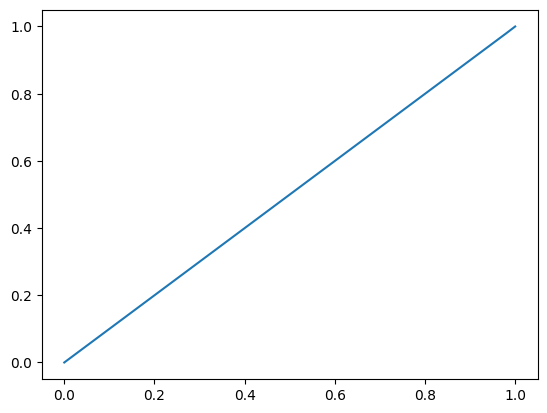

*** AUC, Area under ROC Curve, ROC 곡선 아래부분의 면적: 0.49976741829704135


In [5]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
data = pd.read_csv('/content/drive/MyDrive/work/train_commerce.csv', index_col=0)
df = data.dropna()
print(df.dtypes)
df['Product_importance'] = df['Product_importance'].map({'low':0, 'medium':1, 'high':2})
df['Reached.on.Time_Y.N'] = df['Reached.on.Time_Y.N'].astype('category')
x = df[['Customer_care_calls', 'Product_importance', 'Prior_purchases']].to_numpy()
y = df['Reached.on.Time_Y.N'].to_numpy()
trainx, testx, trainy, testy = train_test_split(x, y, test_size=0.3, random_state=55)
scaler = StandardScaler()
scaler.fit(trainx)
trainx_scale = scaler.transform(trainx)
testx_scale = scaler.transform(testx)
model = LogisticRegression(C=20, max_iter=1000)
model.fit(trainx_scale, trainy)
predictions = model.predict(testx_scale)
print('*** 검증집합 예측 결과(첫 10행:(실제값, 예측값)) ***')
result = pd.DataFrame(np.array([testy, predictions]).transpose(), columns=['Actual', 'Predict'])
print('$$$ 성능평가 주요 지표값 $$$')
print(classification_report(result['Actual'], result['Predict']))
print('*** F1 Score 계산 모듈 이용 ***')
print('F1-Score: ', end=''); print(f1_score(result['Actual'], result['Predict']))
print('*** Accuracy 계산 모듈 이용 ***')
print('Accuracy (정확도): ', end='');
print(accuracy_score(result['Actual'], result['Predict']))
print('*** Precision 계산 모듈 이용 ***')
print('Precision (정밀도): ', end='');
print(precision_score(result['Actual'], result['Predict']))
print('*** Recall (재현율) 계산 모듈 이용 ***')
print(' Recall (재현율): ', end='');
print(recall_score(result['Actual'], result['Predict']))
print('^^^ ROC Curve ^^^')
fpr, tpr, thresholds = roc_curve(result['Actual'], result['Predict'])
plt.plot(fpr, tpr); plt.show()
print('*** AUC, Area under ROC Curve, ROC 곡선 아래부분의 면적: ', end=''); print(auc(fpr, tpr))

In [6]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.svm import SVC
data = pd.read_csv('/content/drive/MyDrive/work/train_commerce.csv', index_col=0)
df = data.dropna()
print(df.dtypes)
df['Product_importance'] = df['Product_importance'].map({'low':0, 'medium':1, 'high':2})
df['Reached.on.Time_Y.N'] = df['Reached.on.Time_Y.N'].astype('category')
x = df[['Customer_care_calls', 'Product_importance', 'Prior_purchases']].to_numpy()
y = df['Reached.on.Time_Y.N'].to_numpy()
trainx, testx, trainy, testy = train_test_split(x, y, test_size=0.3, random_state=55)
scaler = StandardScaler()
xtrainscaled = scaler.fit_transform(trainx)
xtestscaled = scaler.fit_transform(testx)
model = SVC(kernel='rbf', C=10, gamma=0.1, random_state=42)
model.fit(xtrainscaled, trainy)
ypred = model.predict(xtestscaled)
accuracy = accuracy_score(testy, ypred)
print('SVM 모형의 성능(정확도): ', end=''); print(accuracy)
print('$$$ 혼동행렬, Confusion Matrix $$$')
print(confusion_matrix(testy, ypred))
print('** 성능평가 지표값 **')
print(classification_report(testy, ypred))
resultsvm = pd.DataFrame(np.zeros((3300, 2)), columns=['Actual', 'Prediction'])
resultsvm['Actual'] = pd.DataFrame(testy)
resultsvm['Prediction'] = pd.DataFrame(ypred)
print(resultsvm.head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Warehouse_block        object
Mode_of_Shipment       object
Customer_care_calls     int64
Customer_rating         int64
Cost_of_the_Product     int64
Prior_purchases         int64
Product_importance     object
Gender                 object
Discount_offered        int64
Weight_in_gms           int64
Reached.on.Time_Y.N     int64
dtype: object
SVM 모형의 성능(정확도): 0.6051515151515151
$$$ 혼동행렬, Confusion Matrix $$$
[[  17 1291]
 [  12 1980]]
** 성능평가 지표값 **
              precision    recall  f1-score   support

           0       0.59      0.01      0.03      1308
           1       0.61      0.99      0.75      1992

    accuracy                           0.61      3300
   macro avg       0.60      0.50      0.39      3300
weighted avg       0.60      0.61      0.46      3300

   Actual  Prediction
0       0           1
1       0           1
2       1           1
3  

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
F1-Score: 0.7524225726771804
Accuracy (정확도): 0.6051515151515151
Precision (정밀도): 0.6053194741669214
Recall (재현율): 0.9939759036144579
*** ROC Curve ***


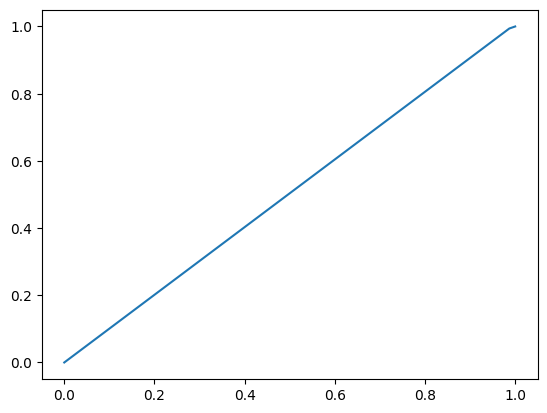

*** AUC, Area under ROC Curve, ROC 곡선 아래부분의 면적: 0.5034864227552412


In [7]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
import matplotlib.pyplot as plt
from sklearn.svm import SVC
data = pd.read_csv('/content/drive/MyDrive/work/train_commerce.csv', index_col=0)
df = data.dropna()
df['Product_importance'] = df['Product_importance'].map({'low':0, 'medium':1, 'high':2})
df['Reached.on.Time_Y.N'] = df['Reached.on.Time_Y.N'].astype('category')
x = df[['Customer_care_calls', 'Product_importance', 'Prior_purchases']].to_numpy()
y = df['Reached.on.Time_Y.N'].to_numpy()
trainx, testx, trainy, testy = train_test_split(x, y, test_size=0.3, random_state=55)
scaler = StandardScaler()
xtrainscaled = scaler.fit_transform(trainx)
xtestscaled = scaler.fit_transform(testx)
model = SVC(kernel='rbf', C=10, gamma=0.1, random_state=42)
model.fit(xtrainscaled, trainy)
ypred = model.predict(xtestscaled)
print('F1-Score: ', end=''); print(f1_score(testy, ypred))
print('Accuracy (정확도): ', end=''); print(accuracy_score(testy, ypred))
print('Precision (정밀도): ', end=''); print(precision_score(testy, ypred))
print('Recall (재현율): ', end=''); print(recall_score(testy, ypred))
print('*** ROC Curve ***')
fpr, tpr, thresholds = roc_curve(testy, ypred)
plt.plot(fpr, tpr); plt.show()
print('*** AUC, Area under ROC Curve, ROC 곡선 아래부분의 면적: ', end=''); print(auc(fpr, tpr))

In [8]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
data = pd.read_csv('/content/drive/MyDrive/work/train_commerce.csv', index_col=0)
df = data.dropna()
df['Product_importance'] = df['Product_importance'].map({'low':0, 'medium':1, 'high':2})
df['Reached.on.Time_Y.N'] = df['Reached.on.Time_Y.N'].astype('category')
x = df[['Customer_care_calls', 'Product_importance', 'Prior_purchases']].to_numpy()
y = df['Reached.on.Time_Y.N'].to_numpy()
trainx, testx, trainy, testy = train_test_split(x, y, test_size=0.3, random_state=55)
scaler = StandardScaler()
xtrainscaled = scaler.fit_transform(trainx)
xtestscaled = scaler.fit_transform(testx)
model = SVC()
param_grid = {
    'kernel': ['rbf'],
    'C': [0.1, 10],
    'gamma': [0.1, 0.01],
}
grid_search = GridSearchCV(model, param_grid, cv=5, n_jobs=-1)
grid_search.fit(xtrainscaled, trainy)
print('가장 성능이 우수한 파라미터 값(cost, gamma)', end=''); print(grid_search.best_params_)
bestmodel = grid_search.best_estimator_
accuracy = bestmodel.score(xtestscaled, testy)
print('SVM 모형의 성능(정확도): ', end=''); print(accuracy)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
가장 성능이 우수한 파라미터 값(cost, gamma){'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}
SVM 모형의 성능(정확도): 0.6036363636363636


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
%%% 주요 성능평가 지표 값 %%%
              precision    recall  f1-score   support

           0       0.59      0.01      0.03      1308
           1       0.61      0.99      0.75      1992

    accuracy                           0.61      3300
   macro avg       0.60      0.50      0.39      3300
weighted avg       0.60      0.61      0.46      3300

*** Accuracy 계산 모듈 이용 ***
Accuracy (정확도): 0.6051515151515151
*** ROC Curve ***


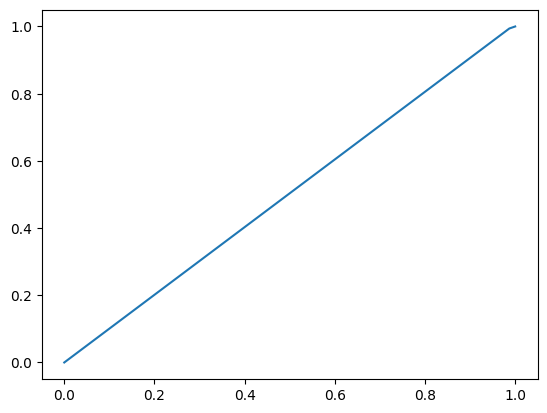

*** AUC, Area under ROC Curve, ROC 곡선 아래부분의 면적: 0.5034864227552412


In [9]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')
data = pd.read_csv('/content/drive/MyDrive/work/train_commerce.csv', index_col=0)
df = data.dropna()
df['Product_importance'] = df['Product_importance'].map({'low':0, 'medium':1, 'high':2})
df['Reached.on.Time_Y.N'] = df['Reached.on.Time_Y.N'].astype('category')
x = df[['Customer_care_calls', 'Product_importance', 'Prior_purchases']].to_numpy()
y = df['Reached.on.Time_Y.N'].to_numpy()
trainx, testx, trainy, testy = train_test_split(x, y, test_size=0.3, random_state=55)
scaler = StandardScaler()
xtrainscaled = scaler.fit_transform(trainx)
xtestscaled = scaler.fit_transform(testx)
model = SVC(kernel='rbf', C=10, gamma=0.1, random_state=42)
model.fit(xtrainscaled, trainy)
ypred = model.predict(xtestscaled)
print('%%% 주요 성능평가 지표 값 %%%')
print(classification_report(testy, ypred))
print('*** Accuracy 계산 모듈 이용 ***')
print('Accuracy (정확도): ', end=''); print(accuracy_score(testy, ypred))
print('*** ROC Curve ***')
fpr, tpr, thresholds = roc_curve(testy, ypred)
plt.plot(fpr, tpr); plt.show()
print('*** AUC, Area under ROC Curve, ROC 곡선 아래부분의 면적: ', end=''); print(auc(fpr, tpr))

In [10]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import CategoricalNB
data = pd.read_csv('/content/drive/MyDrive/work/train_commerce.csv', index_col=0)
df = data.dropna()
print(df.dtypes)
df['Product_importance'] = df['Product_importance'].map({'low':0, 'medium':1, 'high':2})
df['Reached.on.Time_Y.N'] = df['Reached.on.Time_Y.N'].astype('category')
x = df[['Customer_care_calls', 'Product_importance', 'Prior_purchases']].to_numpy()
y = df['Reached.on.Time_Y.N'].to_numpy()
trainx, testx, trainy, testy = train_test_split(x, y, test_size=0.3, random_state=42)
model = CategoricalNB(alpha=0.8).fit(trainx, trainy)
predictions= model.predict(testx)
print(predictions[:10])
print(model.get_params())
print('범주형 독립변수의 경우 예측 성능(정확도)/CategoricalNB 모듈')
print(model.score(testx, testy))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Warehouse_block        object
Mode_of_Shipment       object
Customer_care_calls     int64
Customer_rating         int64
Cost_of_the_Product     int64
Prior_purchases         int64
Product_importance     object
Gender                 object
Discount_offered        int64
Weight_in_gms           int64
Reached.on.Time_Y.N     int64
dtype: object
[1 1 1 0 1 1 1 1 1 1]
{'alpha': 0.8, 'class_prior': None, 'fit_prior': True, 'force_alpha': 'warn', 'min_categories': None}
범주형 독립변수의 경우 예측 성능(정확도)/CategoricalNB 모듈
0.5893939393939394


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Warehouse_block        object
Mode_of_Shipment       object
Customer_care_calls     int64
Customer_rating         int64
Cost_of_the_Product     int64
Prior_purchases         int64
Product_importance     object
Gender                 object
Discount_offered        int64
Weight_in_gms           int64
Reached.on.Time_Y.N     int64
dtype: object
[1 1 1 0 1 1 1 1 1 1]
{'alpha': 0.8, 'class_prior': None, 'fit_prior': True, 'force_alpha': 'warn', 'min_categories': None}
범주형 독립변수의 경우 예측 성능(정확도)/CategoricalNB 모듈
0.5893939393939394
$$$ Confusion Matrix, 혼동행렬 $$$
[[ 262 1050]
 [ 305 1683]]
*** 분류 분석 모형 성능평가 지표 ***
              precision    recall  f1-score   support

           0       0.46      0.20      0.28      1312
           1       0.62      0.85      0.71      1988

    accuracy                           0.59      3300
   macro avg       0.54      0.52      0.5

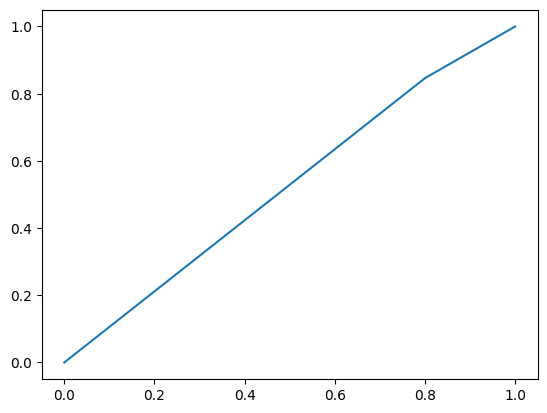

*** AUC, Area under ROC Curve, ROC 곡선 아래부분의 면적: 0.5231372994061932


In [11]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
from sklearn.naive_bayes import CategoricalNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
import matplotlib.pyplot as plt
data = pd.read_csv('/content/drive/MyDrive/work/train_commerce.csv', index_col=0)
df = data.dropna(); print(df.dtypes)
df['Product_importance'] = df['Product_importance'].map({'low':0, 'medium':1, 'high':2})
df['Reached.on.Time_Y.N'] = df['Reached.on.Time_Y.N'].astype('category')
x = df[['Customer_care_calls', 'Product_importance', 'Prior_purchases']].to_numpy()
y = df['Reached.on.Time_Y.N'].to_numpy()
trainx, testx, trainy, testy = train_test_split(x, y, test_size=0.3, random_state=42)
model = CategoricalNB(alpha=0.8).fit(trainx, trainy)
predictions= model.predict(testx)
print(predictions[:10])
print(model.get_params())
print('범주형 독립변수의 경우 예측 성능(정확도)/CategoricalNB 모듈')
print(model.score(testx, testy))
print('$$$ Confusion Matrix, 혼동행렬 $$$')
conf = confusion_matrix(testy, predictions); print(conf)
print('*** 분류 분석 모형 성능평가 지표 ***')
print(classification_report(testy, predictions))
print('F1-Score: ', end=''); print(f1_score(testy, predictions))
print('Accuracy (정확도): ', end=''); print(accuracy_score(testy, predictions))
print('Precision (정밀도): ', end=''); print(precision_score(testy, predictions))
print('Recall (재현율): ', end=''); print(recall_score(testy, predictions))
print('*** ROC Curve ***')
fpr, tpr, thresholds = roc_curve(testy, predictions)
plt.plot(fpr, tpr); plt.show()
print('*** AUC, Area under ROC Curve, ROC 곡선 아래부분의 면적: ', end=''); print(auc(fpr, tpr))

In [13]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
data = pd.read_csv('/content/drive/MyDrive/work/train_commerce.csv', index_col=0)
df = data.dropna()
df['Product_importance'] = df['Product_importance'].map({'low':0, 'medium':1, 'high':2})
df['Reached.on.Time_Y.N'] = df['Reached.on.Time_Y.N'].astype('category')
x = df[['Customer_care_calls', 'Product_importance', 'Prior_purchases']].to_numpy()
y = df['Reached.on.Time_Y.N'].to_numpy()
trainx, testx, trainy, testy = train_test_split(x, y, test_size=0.3, random_state=42)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(trainx, trainy)
predictions = model.predict(testx)
print(predictions[:10])
print('Random Forest (랜덤포레스트) 분류 모형 성능(정확도): ', end=''); print(accuracy_score(testy, predictions))
print('$$$ Confusion Matrix, 혼동행렬 $$$')
conf = confusion_matrix(testy, predictions); print(conf)
print('*** 분류 분석 모형 성능평가 지표 ***')
print(classification_report(testy, predictions))
print('!!! 특성 중요도 !!!')
print(model.feature_importances_)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
[1 1 1 0 1 1 1 1 1 1]
Random Forest (랜덤포레스트) 분류 모형 성능(정확도): 0.5906060606060606
$$$ Confusion Matrix, 혼동행렬 $$$
[[ 253 1059]
 [ 292 1696]]
*** 분류 분석 모형 성능평가 지표 ***
              precision    recall  f1-score   support

           0       0.46      0.19      0.27      1312
           1       0.62      0.85      0.72      1988

    accuracy                           0.59      3300
   macro avg       0.54      0.52      0.49      3300
weighted avg       0.56      0.59      0.54      3300

!!! 특성 중요도 !!!
[0.31813388 0.10971122 0.57215491]


In [15]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
data = pd.read_csv('/content/drive/MyDrive/work/train_commerce.csv', index_col=0)
df = data.dropna()
df['Product_importance'] = df['Product_importance'].map({'low':0, 'medium':1, 'high':2})
df['Reached.on.Time_Y.N'] = df['Reached.on.Time_Y.N'].astype('category')
x = df[['Customer_care_calls', 'Product_importance', 'Prior_purchases']].to_numpy()
y = df['Reached.on.Time_Y.N'].to_numpy()
trainx, testx, trainy, testy = train_test_split(x, y, test_size=0.3, random_state=42)
model = GradientBoostingClassifier(n_estimators=500, learning_rate=0.2, random_state=42)
model.fit(trainx, trainy)
predictions = model.predict(testx)
print(predictions[:10])
print('ExtraTreesClassifier 정확도(Boostrap 샘플 미사용): ', end=''); print(accuracy_score(testy, predictions))
print('$$$ Confusion Matrix, 혼동행렬 $$$')
conf = confusion_matrix(testy, predictions); print(conf)
print('*** 분류 분석 모형 성능평가 지표 ***')
print(classification_report(testy, predictions)); print(conf)
print('*** 분류 분석 모형 성능평가 지표 ***')
print(classification_report(testy, predictions))
print('!!! 특성 중요도 !!!')
print(model.feature_importances_)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
[1 1 1 0 1 1 1 1 1 1]
ExtraTreesClassifier 정확도(Boostrap 샘플 미사용): 0.593030303030303
$$$ Confusion Matrix, 혼동행렬 $$$
[[ 245 1067]
 [ 276 1712]]
*** 분류 분석 모형 성능평가 지표 ***
              precision    recall  f1-score   support

           0       0.47      0.19      0.27      1312
           1       0.62      0.86      0.72      1988

    accuracy                           0.59      3300
   macro avg       0.54      0.52      0.49      3300
weighted avg       0.56      0.59      0.54      3300

[[ 245 1067]
 [ 276 1712]]
*** 분류 분석 모형 성능평가 지표 ***
              precision    recall  f1-score   support

           0       0.47      0.19      0.27      1312
           1       0.62      0.86      0.72      1988

    accuracy                           0.59      3300
   macro avg       0.54      0.52      0.49      3300
weighted avg       0.56      0.59      0.54      3300


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
분류결과 첫 10행 출력
[1 1 1 1 1 1 1 1 1 1]
Decision Tree 분류기(결정트리 알고리즘) 정확도: 0.5966906082371125
$$$ Confusion Matrix, 혼동행렬 $$$
[[   0 4436]
 [   0 6563]]
*** 분류 분석 모형 성능평가 지표 ***
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      4436
           1       0.60      1.00      0.75      6563

    accuracy                           0.60     10999
   macro avg       0.30      0.50      0.37     10999
weighted avg       0.36      0.60      0.45     10999

!!! 특성 중요도 !!!
[0.17628003 0.         0.82371997]


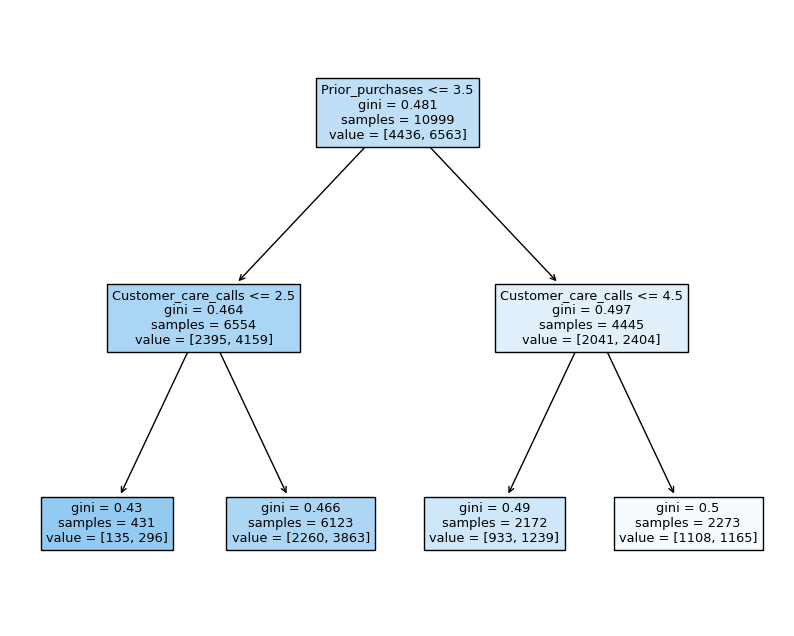

In [17]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_validate
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings('ignore')
data = pd.read_csv('/content/drive/MyDrive/work/train_commerce.csv', index_col=0)
df = data.dropna()
df['Product_importance'] = df['Product_importance'].map({'low':0, 'medium':1, 'high':2})
df['Reached.on.Time_Y.N'] = df['Reached.on.Time_Y.N'].astype('category')
x = df[['Customer_care_calls', 'Product_importance', 'Prior_purchases']].to_numpy()
y = df['Reached.on.Time_Y.N'].to_numpy()
trainx, testx, trainy, testy = train_test_split(x, y, test_size=0.3, random_state=42)
model = DecisionTreeClassifier(max_depth=2, random_state=42)
scores = cross_validate(model, x, y, return_train_score=True)
model.fit(x, y)
predictions = model.predict(x)
print('분류결과 첫 10행 출력')
print(predictions[:10])
print('Decision Tree 분류기(결정트리 알고리즘) 정확도: ', end=''); print(accuracy_score(y, predictions))
print('$$$ Confusion Matrix, 혼동행렬 $$$')
conf = confusion_matrix(y, predictions); print(conf)
print('*** 분류 분석 모형 성능평가 지표 ***')
print(classification_report(y, predictions))
print('!!! 특성 중요도 !!!')
print(model.feature_importances_)
plt.figure(figsize= (10, 8))
plot_tree(model, filled=True, feature_names=['Customer_care_calls', 'Product_importance', 'Prior_purchases'])
plt.show()

In [21]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
from statsmodels.formula.api import ols
import math
data = pd.read_csv('/content/drive/MyDrive/work/mtcars.csv', header=0, index_col=0)
print(data.head())
x = data[['disp', 'hp', 'wt', 'qsec']]
y = data['mpg']
fit = ols('y ~ x', data=data).fit()
data['pred'] = fit.fittedvalues
print(data.head())
print('$$$ (실제값, 예측값) 첫 10행 출력 $$$')
results = data[['mpg', 'pred']]
print(results.head(10))
me = (data['mpg']-data['pred']).mean()
print('평균 예측 오차(Mean of Errors)/ME: ', end=''); print(me)
mse = ((data['mpg']-data['pred'])*(data['mpg']-data['pred'])).mean()
print('평균 제곱 오차(Mean of Squared Errors)/MSE: ', end=''); print(mse)
rmse = math.sqrt(mse)
print('표준 오차(Root Mean Squared Error)/RMSE: ', end=''); print(rmse)
mae = (abs(data['mpg']-data['pred'])).mean()
print('평균 절대 오차(Mean of Absolute Errors)/MAE: ', end=''); print(mae)
mpe = ((data['mpg']-data['pred'])/data['mpg']).mean()
print('평균 백분오차 비율(Mean of Percentage Errors)/MPE: ', end=''); print(mpe)
mape = (abs((data['mpg']-data['pred'])/data['mpg'])).mean()
print('평균 절대 백분오차 비율(Mean of Absolute Percentage Errors)/MAPE: ', end=''); print(mape)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
                    mpg  cyl   disp   hp  drat     wt   qsec  vs  am  gear  \
model                                                                        
Mazda RX4          21.0    6  160.0  110  3.90  2.620  16.46   0   1     4   
Mazda RX4 Wag      21.0    6  160.0  110  3.90  2.875  17.02   0   1     4   
Datsun 710         22.8    4  108.0   93  3.85  2.320  18.61   1   1     4   
Hornet 4 Drive     21.4    6  258.0  110  3.08  3.215  19.44   1   0     3   
Hornet Sportabout  18.7    8  360.0  175  3.15  3.440  17.02   0   0     3   

                   carb  
model                    
Mazda RX4             4  
Mazda RX4 Wag         4  
Datsun 710            1  
Hornet 4 Drive        1  
Hornet Sportabout     2  
                    mpg  cyl   disp   hp  drat     wt   qsec  vs  am  gear  \
model                                                           

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
                    mpg  cyl   disp   hp  drat     wt   qsec  vs  am  gear  \
model                                                                        
Mazda RX4          21.0    6  160.0  110  3.90  2.620  16.46   0   1     4   
Mazda RX4 Wag      21.0    6  160.0  110  3.90  2.875  17.02   0   1     4   
Datsun 710         22.8    4  108.0   93  3.85  2.320  18.61   1   1     4   
Hornet 4 Drive     21.4    6  258.0  110  3.08  3.215  19.44   1   0     3   
Hornet Sportabout  18.7    8  360.0  175  3.15  3.440  17.02   0   0     3   

                   carb  
model                    
Mazda RX4             4  
Mazda RX4 Wag         4  
Datsun 710            1  
Hornet 4 Drive        1  
Hornet Sportabout     2  
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:             

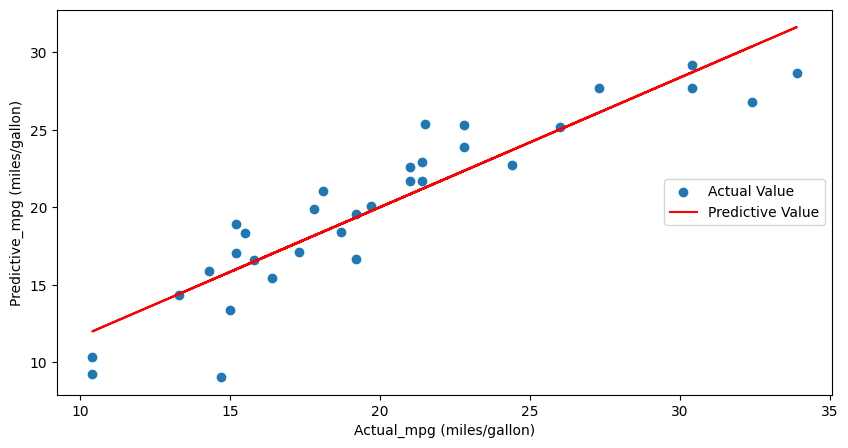

In [22]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
from statsmodels.formula.api import ols
import math
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
data = pd.read_csv('/content/drive/MyDrive/work/mtcars.csv', header=0, index_col=0)
print(data.head())
x = data[['disp', 'hp', 'wt', 'qsec']]
y = data['mpg']
fit = ols('y ~ x', data=data).fit()
print(fit.summary())
data['pred'] = fit.fittedvalues
print('$$$ 잔차값, Residuals, 첫5행 $$$')
print(fit.resid[:5])
print('잔차값의 평균: ', end=''); print(fit.resid.mean())
model = LinearRegression()
model.fit(data[['mpg']], data['pred'])
y_fit = model.predict(y.to_numpy().reshape(-1,1))
plt.figure(figsize=(10,5))
plt.scatter(y, data['pred'])
plt.plot(y, y_fit, color='red')
plt.xlabel('Actual_mpg (miles/gallon)')
plt.ylabel('Predictive_mpg (miles/gallon)')
plt.legend(('Actual Value', 'Predictive Value'), loc='center right'); plt.show()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
                    mpg  cyl   disp   hp  drat     wt   qsec  vs  am  gear  \
model                                                                        
Mazda RX4          21.0    6  160.0  110  3.90  2.620  16.46   0   1     4   
Mazda RX4 Wag      21.0    6  160.0  110  3.90  2.875  17.02   0   1     4   
Datsun 710         22.8    4  108.0   93  3.85  2.320  18.61   1   1     4   
Hornet 4 Drive     21.4    6  258.0  110  3.08  3.215  19.44   1   0     3   
Hornet Sportabout  18.7    8  360.0  175  3.15  3.440  17.02   0   0     3   

                   carb  
model                    
Mazda RX4             4  
Mazda RX4 Wag         4  
Datsun 710            1  
Hornet 4 Drive        1  
Hornet Sportabout     2  
0.9454044653052825
[15.68888889 15.68888889 32.4        32.4        27.9        23.6
 15.68888889 23.6        20.7        27.9       ]
MSE: 31

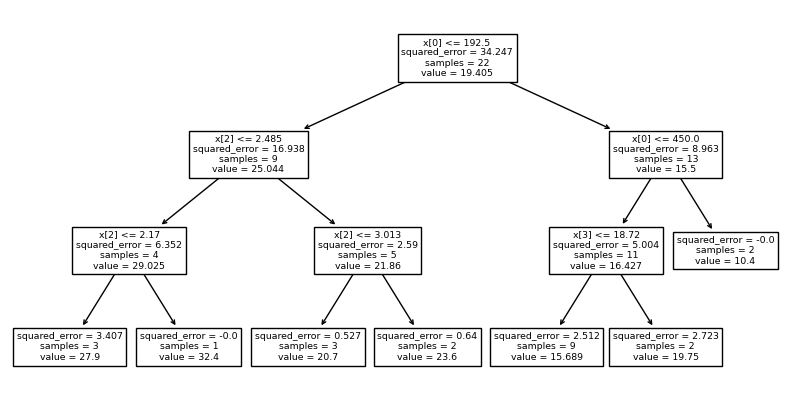

In [25]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
data = pd.read_csv('/content/drive/MyDrive/work/mtcars.csv', header=0, index_col=0)
print(data.head())
x = data[['disp', 'hp', 'wt', 'qsec']]
y = data['mpg']
trainx, testx, trainy, testy = train_test_split(x, y, test_size=0.3, random_state=55)
model = DecisionTreeRegressor(max_depth=3, random_state=55)
results = model.fit(trainx, trainy)
print(model.score(trainx, trainy))
ypred = model.predict(testx)
print(ypred[:10])
mse = mean_squared_error(testy, ypred)
print('MSE: ', end=''); print(mse)
mae = mean_absolute_error(testy, ypred)
print('평균 제곱 오차(Mean Squared Error): ', end=''); print(round(mse, 4))
mae = mean_absolute_error(testy, ypred)
print('평균 절대 오차(Mean Absolute Error): ', end=''); print(round(mae, 4))
print('의사결정나무 분석모형 성능(정확도(%)/Rsquared, 훈련 데이터세트): ', end=''); print(100*model.score(trainx, trainy))
print('의사결정나무 분석모형 성능(정확도(%)/Rsquared, 검증 데이터세트): ', end=''); print('', end=''); print(100*model.score(testx, testy))
print('특성 중요도: ', end=''); print(model.feature_importances_)
plt.figure(figsize=(10, 5))
plot_tree(model); plt.show()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


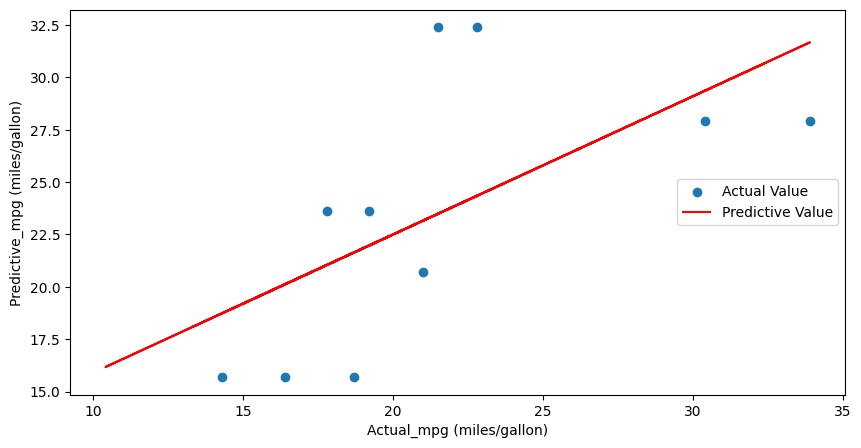

In [27]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
data = pd.read_csv('/content/drive/MyDrive/work/mtcars.csv', header=0, index_col=0)
x = data[['disp', 'hp', 'wt', 'qsec']]
y = data['mpg']
trainx, testx, trainy, testy = train_test_split(x, y, test_size=0.3, random_state=55)
dt = DecisionTreeRegressor(max_depth=3, random_state=55)
results = dt.fit(trainx, trainy)
ypred = dt.predict(testx)
model = LinearRegression()
model.fit(testy.to_frame(), ypred)
y_fit = model.predict(y.to_numpy().reshape(-1,1))
plt.figure(figsize=(10,5))
plt.scatter(testy, ypred)
plt.plot(y, y_fit, color='red')
plt.xlabel('Actual_mpg (miles/gallon)')
plt.ylabel('Predictive_mpg (miles/gallon)')
plt.legend(('Actual Value', 'Predictive Value'), loc='center right'); plt.show()

In [29]:
from google.colab import drive
drive.mount('/content/drive')
from tensorflow import keras
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_log_error
import numpy as np
data = pd.read_csv('/content/drive/MyDrive/work/mtcars.csv', header=0, index_col=0)
x = data[['disp', 'hp', 'wt', 'qsec']].to_numpy()
y = data[['mpg']].to_numpy()
scaler = MinMaxScaler()
xscaled = scaler.fit_transform(x)
yscaled = scaler.fit_transform(y)
trainx, testx, trainy, testy = train_test_split(xscaled, yscaled, test_size=0.3, random_state=55)
model = keras.Sequential([
    keras.layers.Input(shape=(trainx.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1)
])
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(trainx, trainy, epochs=100, batch_size=16, verbose=0)
loss = model.evaluate(testx, testy)
print('인공신경망 예측 모형 손실(Loss)/Mean Squared Error: ', loss)
predictions_scaled = model.predict(testx)
predictedValue = (y.max()-y.min())*predictions_scaled+y.min()
print(predictedValue[:5])
result = pd.DataFrame(np.zeros((testx.shape[0], 2)), columns=['Actual', 'Prediction'])
result['Actual'] = pd.DataFrame((y.max()-y.min())*testy+y.min())
result['Prediction'] = pd.DataFrame(predictedValue)
print(result.head())
print('Mean Absolute Error(MAE), 평균절대오차: ', end=''); print(mean_absolute_error(result['Actual'], result['Prediction']))
print('Mean Squared Error(MSE), 평균제곱오차: ', end=''); print(mean_squared_error(result['Actual'], result['Prediction']))
print('Root Mean Squared Error(RMSE), 평균제곱근오차: ', end=''); print(np.sqrt(mean_squared_error(result['Actual'], result['Prediction'])))
print('Mean Squared Log Error(MSLE), 평균제곱로그오차: ', end=''); print(mean_squared_log_error(result['Actual'], result['Prediction']))
def MAPE(yt, yp):
  return np.mean(np.abs((yt-yp)/yt)*100)
print('Mean Absolute Percentage Error, 평균절대백분오차비율: ', end=''); print(MAPE(result['Actual'], result['Prediction']))
def MPE(yt, yp):
  return np.mean((yt-yp)/yt)*100
print('Mean Percentage Error, 평균백분오차비율: ', end=''); print(MPE(result['Actual'], result['Prediction']))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
1/1 [==============================] - 0s 246ms/step - loss: 0.0208
인공신경망 예측 모형 손실(Loss)/Mean Squared Error:  0.020787548273801804
1/1 [==============================] - 0s 141ms/step
[[15.767958]
 [15.485033]
 [26.672094]
 [25.554482]
 [27.622   ]]
   Actual  Prediction
0    18.7   15.767958
1    16.4   15.485033
2    21.5   26.672094
3    22.8   25.554482
4    33.9   27.622000
Mean Absolute Error(MAE), 평균절대오차: 2.817641906738281
Mean Squared Error(MSE), 평균제곱오차: 11.479925060250357
Root Mean Squared Error(RMSE), 평균제곱근오차: 3.388203810317549
Mean Squared Log Error(MSLE), 평균제곱로그오차: 0.017781621477021135
Mean Absolute Percentage Error, 평균절대백분오차비율: 12.304544154647704
Mean Percentage Error, 평균백분오차비율: -1.0172224344175302


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
1/1 [==============================] - 0s 139ms/step - loss: 0.0139
인공신경망 예측 모형 손실(Loss)/Mean Squared Error:  0.013872645795345306
1/1 [==============================] - 0s 85ms/step
[[16.592764]
 [15.680627]
 [27.534513]
 [26.109955]
 [30.380262]]


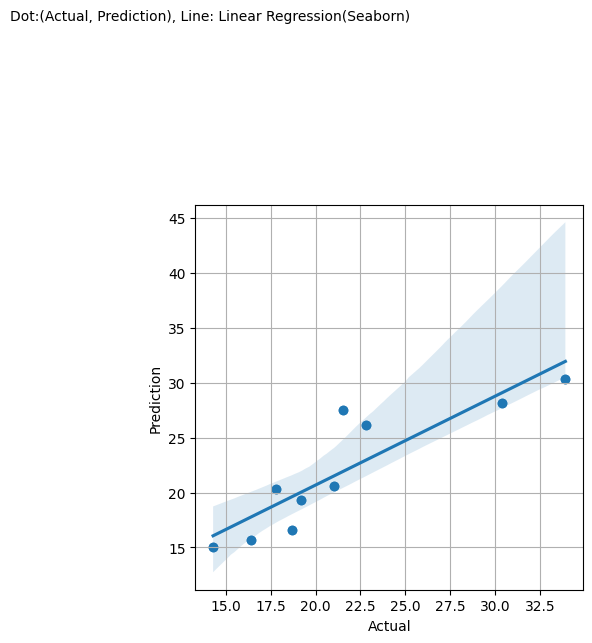

In [30]:
from google.colab import drive
drive.mount('/content/drive')
from tensorflow import keras
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv('/content/drive/MyDrive/work/mtcars.csv', header=0, index_col=0)
x = data[['disp', 'hp', 'wt', 'qsec']].to_numpy()
y = data[['mpg']].to_numpy()
scaler = MinMaxScaler()
xscaled = scaler.fit_transform(x)
yscaled = scaler.fit_transform(y)
trainx, testx, trainy, testy = train_test_split(xscaled, yscaled, test_size=0.3, random_state=55)
model = keras.Sequential([
    keras.layers.Input(shape=(trainx.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1)
])
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(trainx, trainy, epochs=100, batch_size=16, verbose=0)
loss = model.evaluate(testx, testy)
print('인공신경망 예측 모형 손실(Loss)/Mean Squared Error: ', loss)
predictions_scaled = model.predict(testx)
predictedValue = (y.max()-y.min())*predictions_scaled+y.min()
print(predictedValue[:5])
result = pd.DataFrame(np.zeros((testx.shape[0], 2)), columns=['Actual', 'Prediction'])
result['Actual'] = pd.DataFrame((y.max()-y.min())*testy+y.min())
result['Prediction'] = pd.DataFrame(predictedValue)
plt.rcParams['figure.figsize'] = (5, 5)
plt.scatter(result['Actual'], result['Prediction'])
sns.regplot(x='Actual', y='Prediction', data=result)
plt.text(3, 63, 'Dot:(Actual, Prediction), Line: Linear Regression(Seaborn)')
plt.xlabel('Actual'); plt.ylabel('Prediction')
plt.grid(); plt.show()